# Clase RegLinPoli.xls / regresión lineal iterativa 

In [1]:
import pandas as pd
import numpy as np
import csv
import random as rnd
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datos = pd.read_csv("regLinPoli.csv")

In [3]:
datos.head()

,X,X2,X3,X4,y
0,7.317938,53.552216,1.683319,0.859736,20.716319
1,1.284357,1.649574,3.395139,0.959256,8.098008
2,97.740652,9553.235088,0.366480,-0.344100,5992.603427
3,17.753591,315.190006,-1.945300,-0.889370,199.959361
4,66.441081,4414.417290,0.504995,-0.450777,2384.624168


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(datos[['X','X2','X3','X4']],datos['y'], train_size=0.75)

In [5]:
def minc(X_train,y_train,w,w0):
    mc=0.0
    for x in X_train:
        mc=(mc+((x.dot(w)+w0)-y_train[i])**2)/len(X_train)
    return mc

In [6]:
#Normalizamos los datos

scaleX=preprocessing.StandardScaler()
scaleX.fit(X_train)
scaleY=preprocessing.StandardScaler()
scaleY.fit(Y_train)

X_train=scaleX.transform(X_train)
Y_train=scaleY.transform(Y_train)

# #StandardScaler

In [7]:
X_test=scaleX.transform(X_test)
scaleX.fit(X_test)
Y_test=scaleY.transform(Y_test)
scaleY.fit(Y_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

#### Wo=Wo+etha(yi-V_i)
#### w_j=Wo=Wo+etha((yi-V_i)x_j)-lam*w_j

In [8]:
def salida(w0,x):
    return np.sum(np.asarray(w0[1:])*np.asarray(x)) +w0[0]

In [9]:
def entrena(X_train,y_train,w0,l=0.0,etha=0.01):
    for i in range(len(X_train)):
        error=y_train[i]-salida(w0,X_train[i])
        w0[0]=w0[0]+etha*error-l*w0[0]
        for j in range(len(w0)-1):
            w0[j+1]=w0[j+1]+etha*error*X_train[i][j]-l*w0[j+1]
    return w0


In [10]:
w=[rnd.random() for i in range(1+len(X_train[0]))]
for i in range(len(X_train)):
    w=entrena(X_train,Y_train,w)

# Nota: checar la etha(paso)

In [11]:

error=[]
lista=[ x/100.0 for x in range(0,10,1)]
for l in lista:
    w=[rnd.random() for i in range(len(X_train[0])+1)]
    for i in range(10):
        w=entrena(X_train,Y_train,w,l=l,etha=0.0001)
    error.append(minc(X_train,Y_train,w[1:],w[0]))

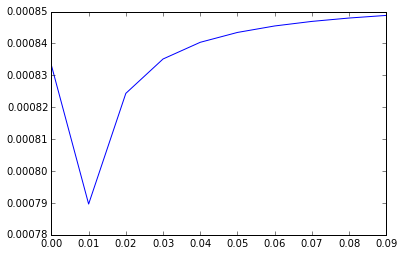

In [12]:
plt.plot(lista,error,color='blue')

In [13]:
print error

[0.00083310818289874221, 0.00078964033168409597, 0.00082435931680313373, 0.0008351345072471956, 0.00084037123726730392, 0.00084346359552983359, 0.00084549415573002221, 0.00084692394983396069, 0.00084798409800234743, 0.00084880229190427826]


In [14]:
lista=[ x/1000.0 for x in range(0,10,1)]

In [15]:
lista

[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]